<a href="https://colab.research.google.com/github/airon14/CpE-AIML/blob/main/58034_Lab05_Millicheckers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Millicheckers***



Dataset: Diabetes


**1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.**

**Purpose of the dataset:**

The purpose of studying this dataset is to study the different data which comes 
from the data set and predict whether the pregnant woman has diabetes 
using different several factors such as blood pressure, glucose, 
insulin, bmi and other factors. The data collected is then tested and plotted to show the positive and negative areas of each factors in whether diabetes exist in the woman. 

**Needs statement:**

This data set gives data on the problems using the factors which affects diabetes such as glucose and bmi. 
By using different visual figures such as plotting and heatmap, the researchers are given data on
how each factors affect diabetes by using logistic regression with the goal of collecting data which could 
be used to create solutions or just to know how each factor increases the risk of diabetes. 

**Significance of the dataset:**

The signifance of this dataset is for the researchers to study the pregnant woman's probability of obtaining diabetes
according to different factors of data such as glucose, number of pregnancy, blood pressure, insulin, bmi and others. By obtaining positive results, the researchers could use this data to predict diabetes from patients and make appropriate actions before the pregnant woman becomes diabetic. 

**2. Identify an algorithm or method in performing a single variable classification using least squares or logistic regression.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
df_diabetes = pd.read_csv('/content/diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_diabetes.shape

(2000, 9)

In [ ]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df_diabetes[feature_cols]
y = df_diabetes.Outcome

In [ ]:
y = y.to_numpy()
y = y.reshape((-1,1))

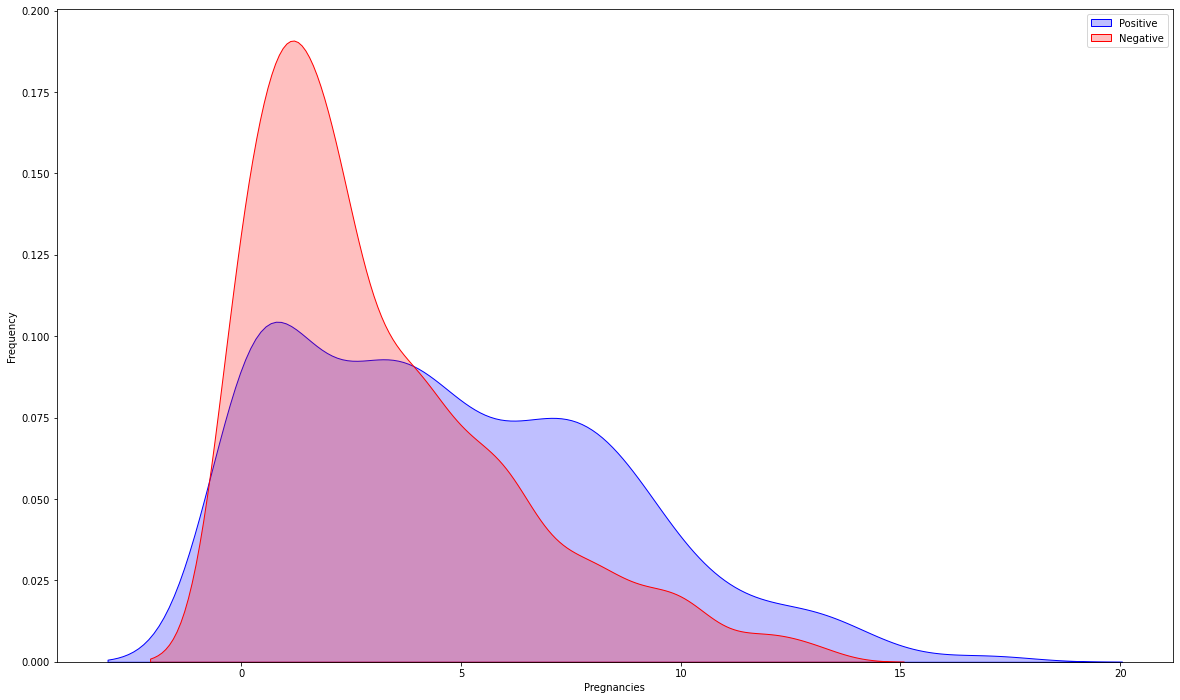

In [ ]:
plt.figure(figsize=(20,12))
g = sns.kdeplot(df_diabetes["Pregnancies"][df_diabetes["Outcome"] == 1], color="Blue", shade = True)
g = sns.kdeplot(df_diabetes["Pregnancies"][df_diabetes["Outcome"] == 0], ax =g, color="Red", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

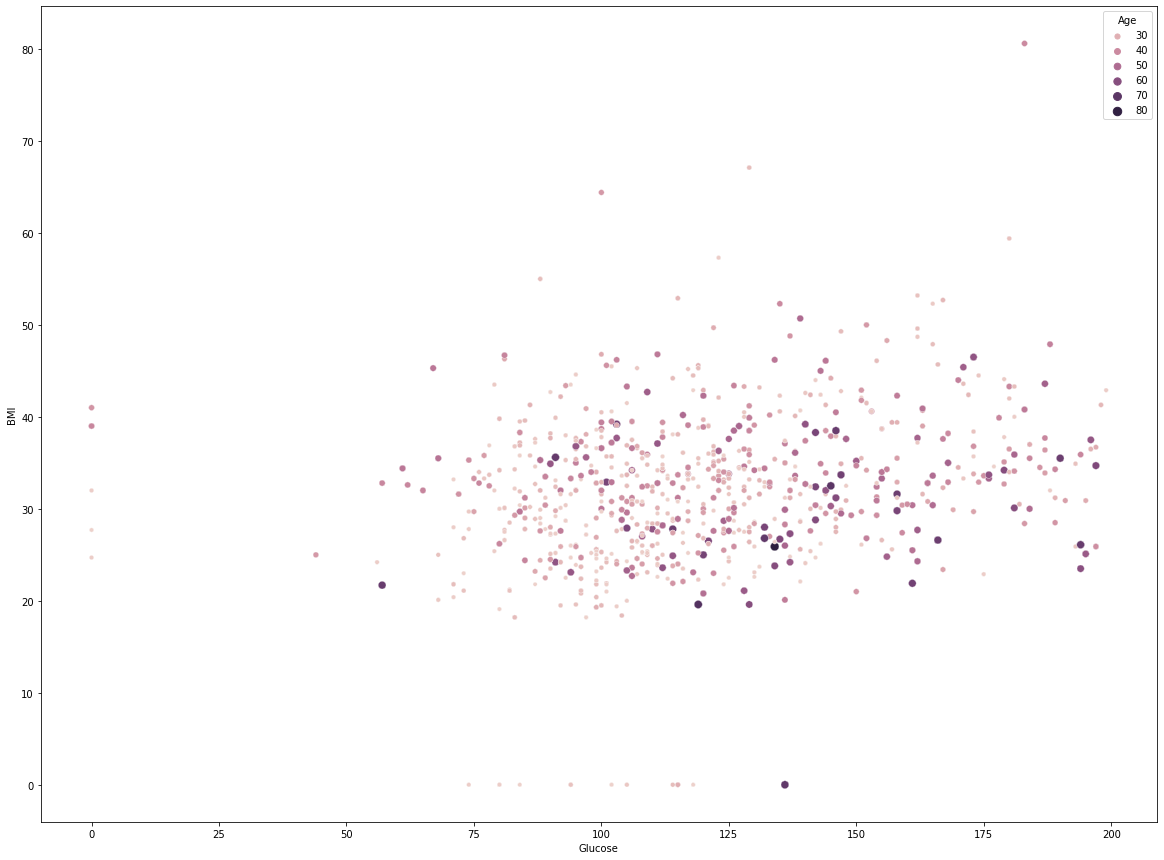

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_diabetes, x="Glucose", y="BMI", hue="Age", size="Age")

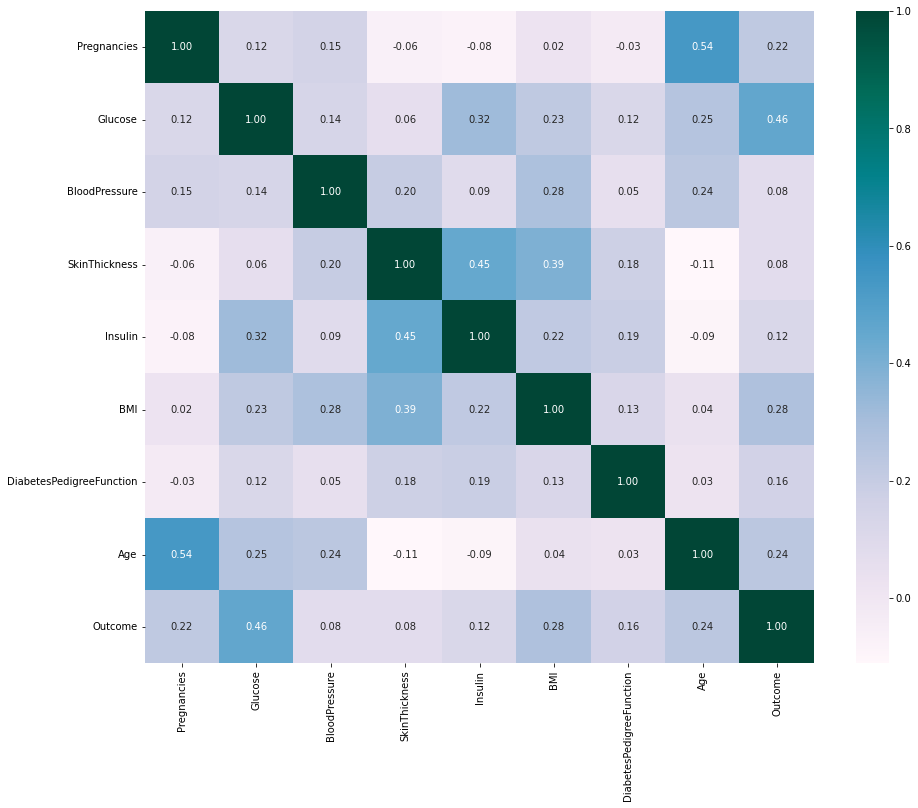

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_diabetes.corr(),annot=True, fmt = ".2f", cmap = "PuBuGn")

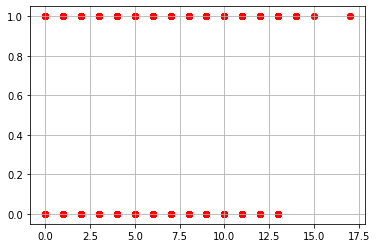

In [ ]:
plt.scatter(X['Pregnancies'],y, color='red')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[298,  36],
       [ 75,  91]])

Text(0.5, 257.44, 'Predicted')

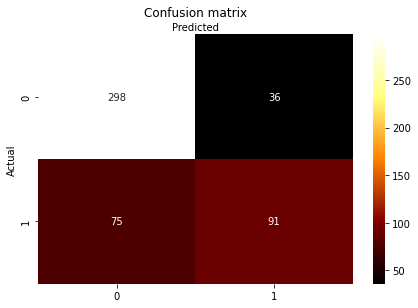

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="afmhot" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.778
Precision: 0.7165354330708661
Recall: 0.5481927710843374
